# Conflict in Iran

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import geopandas as gpd

from datetime import datetime

import bokeh
from bokeh.models import Tabs, TabPanel
from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
from bokeh.plotting import show, output_notebook

import acled_conflict_analysis as acled
from acled_conflict_analysis import visuals
from acled_conflict_analysis import analysis as analysis
from acled_conflict_analysis import extraction

import os

In [3]:
#import acled_conflict

## Overview

Since the Shia Islamic Revolution and subsequent creation of the Islamic Republic of Iran in 1979, the country has been mired in conflict. Conflict causes the reversal of short term and long term economic growth {cite}`le2022economic`. Within this analysis, we extract, and visualize the trend of conflict events and fatalities associated with conflict events in the Islamic Republic of Iran from 2016 to 2024. 


## Data

### Armed Conflict Location & Event Data

The Armed Conflict Location & Event Data Project (ACLED) is a disaggregated data collection, analysis, and crisis mapping project. ACLED collects information on the dates, actors, locations, fatalities, and types of all reported political violence and protest events around the world. Access to this data is via a contract between the World bank and ACLED and can be extracted by any World Bank employee upon registering for an API key. 

ACLED data is available for every day since 2016. The data is released with the exact latitude and longitude coordinates of the reported conflict event. The data is collected from four main types of sources - traditional media, reports, local partner data and new media (targeted and verified). ACLED researchers systematically cover thousands of distinct sources in over 75 languages. Sourcing lists are carefully curated and monitored to maintain accurate coverage. More about the methodology can be found in their [codebook](https://acleddata.com/knowledge-base/codebook/#sources-and-information-sourcing).

Every ACLED event is based on at least one source. The source names or acronyms are noted in the ‘Source’ column. With the exception of certain local sources that wish to remain anonymous, the ‘Source’ column details are sufficient to retrace the sources that have been used to record an event. All sources listed have contributed information to the event. Researchers often find multiple reports confirming details about an event; when multiple sources report on the same information, the most thorough, reliable, and recent report is cited. The ACLED team corrects some of their past entries as they get new information about the reported conflict. 

Data prior to 2016 is not available for this specific country. The Data Lab team reached out to the ACLED team to understand why this is currently the case. 

ACLED data contains 6 main types of conflict events - protests, riots, strategic developments, violence against civilians, battles and explosions/remote violence. 


## Methodology and Implementation

ACLED data are analysed and aggregated to admin levels gathered from [HdX](https://data.humdata.org/). The number of fatalities and conflicts are then shown by different event types and different admin regions. 

Following this, the data were mapped using both open source tools and Tableau. 

**You can find the processed files, dynamic maps and statis images in the [SharePoint folder](https://worldbankgroup.sharepoint.com/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FData%20Lab%2FIran%20Economic%20Monitoring%2FData%2Fconflict&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5)**

## Findings

Write the raw data to a file and read from it. This is to avoid running the API again in case of having to restart kernel/continue analysis

In [6]:
countries_of_interest = ["Iran"]
START_DATE = "2012-01-01"
END_DATE = "2024-10-27"

In [3]:
iran_adm0 = gpd.read_file(
    "../../data/boundaries/irn_admbnda_adm0_unhcr_20190514.shp")
iran_adm1 = gpd.read_file(
    "../../data/boundaries/irn_admbnda_adm1_unhcr_20190514.shp")
iran_adm2 = gpd.read_file(
    "../../data/boundaries/irn_admbnda_adm2_unhcr_20190514.shp")
iran_adm_all = gpd.read_file(
    "../../data/boundaries/irn_admbndl_admALL_unhcr_itos_20190514.shp")

In [7]:
data = extraction.acled_api(
    email_address=os.environ.get("ACLED_EMAIL"),
   access_key=os.environ.get("ACLED_KEY"),
    countries=countries_of_interest,
    start_date=START_DATE,
    end_date=END_DATE
)


c:\WBG\Anaconda3\envs\data-goods\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.acleddata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [8]:
data.to_csv('../../data/conflict/2012-01-01-2024-10-27-Iran.csv')

In [10]:
analysis.data_type_conversion(data)

In [11]:
acled_adm0_annual = analysis.get_acled_by_admin(iran_adm0, data, columns=["ADM0_EN"], freq="YS")
conflict_monthly = analysis.get_acled_by_group(data, columns=["country", "latitude", "longitude"], freq="MS")
acled_adm0 = analysis.get_acled_by_admin(iran_adm0, data, columns=["ADM0_EN"], freq="MS")

In [12]:
events_dict = {datetime(2022, 9,16):'Mahsa Amini\nDeath',
               
               datetime(2019,2,13):'Khash-Zahedan\nsuicide bombing',
               datetime(2022,10,26):'Shah Cherag\nMassacre',
               datetime(2019, 11,15):'Bloody Aban',
               datetime(2024, 1,3):'Kerman\nBombings',
               datetime(2020, 1,3): 'Qasem Soleimani\nAssassination'
               #datetime(2022, 10,5): 'West Azerbaijan\nEarthquake',
               }

### Annual and Monthly Conflict Trends

In [13]:
# output_file("bokeh_plot.html")
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []
titles = [
    "Number of annual fatalities at a national level",
    "Number of annual conflict events at a national level",
]

for idx, type in enumerate(["nrFatalities", "nrEvents"]):
    tabs.append(
        TabPanel(
            child=visuals.get_line_plot(
                acled_adm0_annual,
                f"{titles[idx]}",
                "Source: ACLED. Accessed 19th September 2024",
                subtitle="",
                category="ADM0_EN",
                measure=type,
                #events_dict = events_dict
            ),
            title=type.capitalize(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

**There are significantly higher fatalities in 2019 and 2022.**

However, the number of events in 2018 were higher than 2019. Although the number of fatalities reduced since 2022, the number of conflict events remain high in 2023. 2024 has seen a significant drop. However, it would be best to compare at the end of the year.  

To understand the peaks, we plot a monthly trend along with markers for major events. 

In [14]:
# output_file("bokeh_plot.html")
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []
titles = [
    "Number of monthly conflict events at a national level",
    "Number of monthly fatalities at a national level",
]

for idx, type in enumerate(["nrFatalities", "nrEvents"]):
    tabs.append(
        TabPanel(
            child=visuals.get_line_plot(
                acled_adm0,
                f"{titles[idx]}",
                "Source: ACLED. Accessed 19th September 2024.",
                subtitle="",
                category="ADM0_EN",
                measure=type,
                events_dict = events_dict
            ),
            title=type.capitalize(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

**All the major peaks correspond to significant conflict events, thereby validating the data.** 

Bloody Aban, or Bloody November and the death of Mahsa Amini which triggered a series of protests of riots within the country killing many. 

In [15]:
visuals.get_animated_map(conflict_monthly, 'Iran', 50,'nrFatalities','P1M')

**The notherwestern part of the country has greater conflict than everywhere else. That is also the part of the country that shares a border with Iraq, Turkiye, Armenia and Azerbaijan.** 

2019 and 2022 were particularly brutal years. The worst hit provinces in terms of fatalities, from 2016 till date are Sistan and Baluchestan, West Azerbaijan, Tehran, Kurdistan, and Khuzestan in that order. Below is a trend line of conflict events and fatalities in these 5 provinces. 

In [16]:
acled_adm1_annual = analysis.get_acled_by_admin(iran_adm1, data, columns=["ADM0_EN","ADM1_EN"], freq="YS")
acled_adm1 = analysis.get_acled_by_admin(iran_adm1, data, columns=["ADM0_EN","ADM1_EN"], freq="MS")

worst_fatalities_all_time = list(acled_adm1_annual.groupby(['ADM1_EN'])[['nrEvents', 'nrFatalities']].sum().reset_index().sort_values(by='nrFatalities', ascending=False).head(5)['ADM1_EN'])

### Conflict by Province

In [17]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []
titles = ["Number of conflict events", "Number of fatalities"]

for idx, type in enumerate(["nrFatalities", "nrEvents"]):
    tabs.append(
        TabPanel(
            child=visuals.get_line_plot(
                acled_adm1[acled_adm1['ADM1_EN'].isin(worst_fatalities_all_time)],
                f"{titles[idx]} by province",
                "Source: ACLED. Accessed 19th September 2024",
                subtitle="",
                category="ADM1_EN",
                measure=type,
                events_dict=events_dict
            ),
            title=type.capitalize(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

In [18]:
acled_adm1_annual.groupby(['ADM1_EN'])[['nrEvents', 'nrFatalities']].sum().reset_index().sort_values(by='nrFatalities', ascending=False).head(5).reset_index(drop=True)

ADM1_EN  nrEvents  nrFatalities
0  Sistan and Baluchestan      1037           748
1         West Azerbaijan      1066           470
2                  Tehran      4977           405
3               Kurdistan      1266           334
4               Khuzestan      4117           248

Although Tehran had far more conflict events, Sistan and Baluchestan saw a lot higher fatalities. It is recently being discussed that this predominantly sunni-inhabited province will be divided into smaller provinces [amid high tensions in the region](https://www.iranintl.com/en/202405188549). 

### Conflict by Event Type

In [19]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []
conflict_event_type = analysis.get_acled_by_group(data, columns = ['country','event_type'], freq='MS')

titles = ["Number of fatalities", "Number of conflict events"]

for idx, type in enumerate(["nrFatalities", "nrEvents"]):
    tabs.append(
        TabPanel(
            child=visuals.get_line_plot(
                conflict_event_type,
                f"{titles[idx]} by event type",
                f"Source: ACLED. Accessed {datetime.today().date().isoformat()}",
                subtitle="",
                category="event_type",
                measure=type,
            ),
            title=type.capitalize(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

**The end of 2019 and beginning of 2020 saw the highest number of riots and remote violence within the country, closley followed by riots in 2022.**

Conflicts can also be grouped into social unrest which typically include protests and riots and Armed Violence which includes which includes battles, explosions, strategic developments and violence against civilians. Using this grouping, it is seen that political conflict in the country is significantly higher. 

In [20]:
from bokeh.plotting import show, output_notebook
import bokeh
from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
from bokeh.models import Panel, Tabs, TabPanel

output_notebook()

bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []
measure_names = {
    "nrEvents": "Number of Conflict Events",
    "nrFatalities": "Number of Fatalities",
}
measure_colors = {"nrEvents": "#4E79A7", "nrFatalities": "#F28E2B"}
# acled_adm0 = get_acled_by_admin(syria_adm2_crs, acled, columns = ['ADM2_EN', 'ADM1_EN'])
for category_type in list(conflict_event_type["event_type"].unique()):
    tabs.append(
        TabPanel(
            child=visuals.get_bar_chart(
                conflict_event_type,
                f"Number of {category_type}",
                f"Source: ACLED. Accessed date {datetime.today().date().isoformat()}",
                subtitle="",
                category="event_type",
                measure="nrEvents",
                color_code=measure_colors["nrEvents"],
                category_value=category_type,
                #events_dict=events_dict
            ),
            title=category_type.title(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

**What were the protests about?**

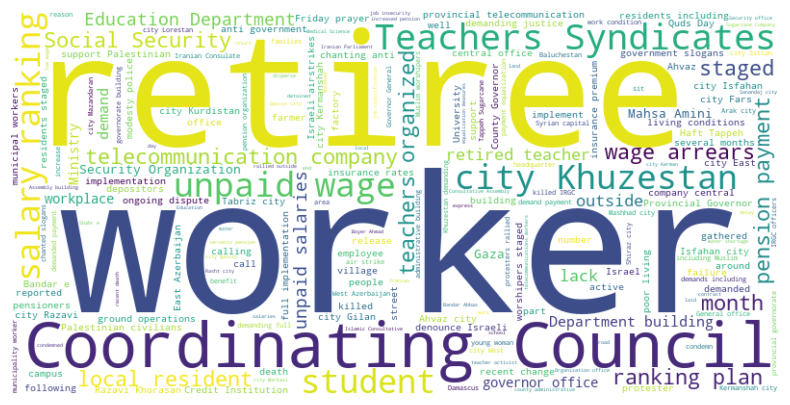

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud_from_column(df, column_name, custom_stopwords):
    # Combine all the text in the specified column into a single string
    text = " ".join(note for note in df[column_name])

    stopwords = set(STOPWORDS)
    if custom_stopwords:
        stopwords.update(custom_stopwords)  

    # Generate the word cloud
     # Generate the word cloud, excluding the stopwords
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stopwords  # Pass the stopwords set here
    ).generate(text)


    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide the axes
    plt.show()

month_names = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
]

custom_stopwords = month_names + ['protest', 'protested', 'great', 'front', 
                    'rally', 'District Tehran', 'Tehran', 'group', 'District', 'held', 'Iran'] 
# Generate and display the word cloud from the 'notes' column
generate_word_cloud_from_column(data[(data['event_type']=='Protests')], 'notes', custom_stopwords)

In [ ]:
iran_adm1

In [23]:
conflict_adm1 = analysis.get_acled_by_admin(iran_adm1,data, ['ADM1_EN', 'event_type'], freq='MS')
conflict_adm1.to_csv('../../data/conflict/iran_acled_adm1_monthly_20241022.csv')

In [24]:
conflict_adm0 = analysis.get_acled_by_admin(iran_adm0,data, ['ADM0_EN', 'event_type'], freq='MS')
conflict_adm0.to_csv('../../data/conflict/iran_acled_adm0_monthly_20241022.csv')

## Limitations

ACLED is a crowdsourced dataset. Despite it being verified through local sources, it does not capture all the of the conflicts that occur in the region. 

## References


{cite:empty}`ROMAN2018113`

```{bibliography}
:filter: docname in docnames
:style: plain
